In [1]:
import numpy as np
from scipy import signal, fftpack
from scipy.io import wavfile
import matplotlib.pyplot as plt
%matplotlib inline

 - https://stackoverflow.com/questions/54592194/fft-of-data-received-from-pyaudio-gives-wrong-frequency
 - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.io.wavfile.read.html
 - https://stackoverflow.com/questions/23377665/python-scipy-fft-wav-files/23378284
 - https://stackoverflow.com/questions/3694918/how-to-extract-frequency-associated-with-fft-values-in-python
 - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.periodogram.html
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html
 - https://www.pacdv.com/sounds/voices/aaaah.wav

In [2]:
rate, data = wavfile.read('aaaah.wav')

In [3]:
#rate, data = wavfile.read('tone.wav')

In [4]:
rate

48000

In [5]:
t = np.arange(data.shape[0])/rate

In [6]:
data.shape

(46447, 2)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


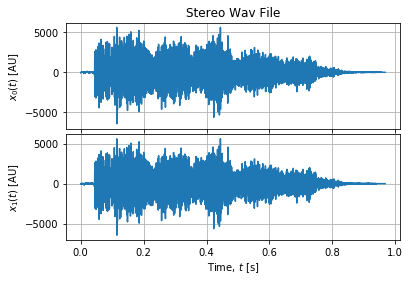

In [7]:
fig, axe = plt.subplots(2, 1, sharex=True, sharey=True, gridspec_kw={'hspace': 0.05})
axe[0].plot(t, data[:,0])
axe[1].plot(t, data[:,1])
axe[0].set_title('Stereo Wav File')
axe[1].set_xlabel(r'Time, $t$ $[\mathrm{s}]$')
for i in range(2):
    axe[i].set_ylabel(r'$x_%d(t)$ $[\mathrm{AU}]$' % i)
    axe[i].grid()
fig.tight_layout()
fig.savefig('signal.png')

In [8]:
f, P = signal.periodogram(data, rate, axis=0)

In [9]:
P.shape

(23224, 2)

In [10]:
f.shape

(23224,)

In [11]:
#fq = np.linspace(0, 1, Pxx_den.shape[0])*rate/2
#f = np.linspace(0, f[-1], Pxx_den.shape[0])

(23224,) (23224, 2)


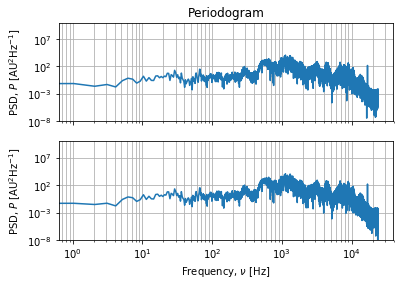

In [12]:
f, Pxx_den = signal.periodogram(data, rate, axis=0, detrend='linear')
print(f.shape, P.shape)
fig, axe = plt.subplots(2, 1, sharex=True, sharey=True)
axe[0].loglog(f, P[:,0])
axe[1].loglog(f, P[:,1])
#axe.set_xlim([0,500])
axe[0].set_ylim([1e-8, 1e10])
axe[1].set_xlabel(r'Frequency, $\nu$ $[\mathrm{Hz}]$')
axe[0].set_ylabel(r'PSD, $P$ $[\mathrm{AU^2Hz}^{-1}]$')
axe[1].set_ylabel(r'PSD, $P$ $[\mathrm{AU^2Hz}^{-1}]$')
axe[0].set_title('Periodogram')
axe[0].grid(which='both')
axe[1].grid(which='both')
fig.savefig('transform.png')

(513,) (513, 2)
[   46.875  2625.    13312.5   16921.875]


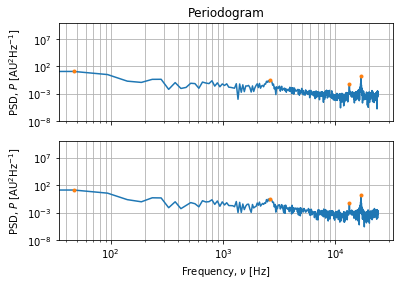

In [13]:
f, P = signal.periodogram(data[:2**10,:], rate, axis=0, detrend='linear')
print(f.shape, P.shape)
idx0 = signal.find_peaks(P[:,0], threshold=0.01, distance=50)[0]
idx1 = signal.find_peaks(P[:,1], threshold=0.01, distance=50)[0]
print(f[idx0])
fig, axe = plt.subplots(2, 1, sharex=True, sharey=True)
axe[0].loglog(f, P[:,0])
axe[0].loglog(f[idx0], P[idx0,0], '.')
axe[1].loglog(f, P[:,1])
axe[1].loglog(f[idx1], P[idx1,1], '.')
#axe.set_xlim([0,500])
axe[0].set_ylim([1e-8, 1e10])
axe[1].set_xlabel(r'Frequency, $\nu$ $[\mathrm{Hz}]$')
axe[0].set_ylabel(r'PSD, $P$ $[\mathrm{AU^2Hz}^{-1}]$')
axe[1].set_ylabel(r'PSD, $P$ $[\mathrm{AU^2Hz}^{-1}]$')
axe[0].set_title('Periodogram')
axe[0].grid(which='both')
axe[1].grid(which='both')
fig.savefig('transform.png')

In [14]:
def freq(filename, setup={'height': 1e-4}):
    rate, data = wavfile.read(filename)
    f, P = signal.periodogram(data, rate)
    f = np.linspace(0, f[-1], P.shape[0])
    return f[signal.find_peaks(P, **setup)[0][0]]

In [15]:
freq('tone.wav')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


440.0

In [16]:
2**16

65536